## First Tuning

In [19]:
device = "cpu"
print(f"Using device: {device}")

Using device: cpu


### Dataset Handling

In [4]:
from clip_EuroSAT import load_eurosat

train_loader, val_loader, class_names = load_eurosat()
print("Load EuroSAT.")

Load EuroSAT.


### Load CLIP Model

In [6]:
from clip_EuroSAT import load_clip_model

model, preprocess = load_clip_model("ViT-B/32")

Loaded CLIP model: ViT-B/32


### Zero-Shot Evaluation

In [7]:
from clip_EuroSAT import evaluate_clip_on_dataset

zero_shot_accuracy = evaluate_clip_on_dataset(model, val_loader, class_names)

Evaluating: 100%|██████████| 1350/1350 [05:42<00:00,  3.95it/s]

Zero-shot accuracy: 33.50%


### Fine-Tuning Class for CLIP

In [8]:
from clip_EuroSAT import CLIPFineTuner, save_model

fine_tuner = CLIPFineTuner(model, len(class_names), learning_rate=1e-4)
num_epochs = 5
best_accuracy = 0.88

losses = []
val_accuracies = []  

for epoch in range(num_epochs):
        avg_loss = fine_tuner.train_epoch(train_loader)
        losses.append(avg_loss)
        print(f"Epoch {epoch+1}/{num_epochs}, Avg Loss: {avg_loss:.4f}")

        val_accuracy = fine_tuner.evaluate(val_loader)
        val_accuracies.append(val_accuracy)
        print(f"Validation Accuracy: {val_accuracy:.2f}%")

        save_path = "saved_models/fine_tuned_clip.pt"
        if val_accuracy > best_accuracy:
            best_accuracy = val_accuracy
            save_model(fine_tuner, fine_tuner.optimizer, epoch, save_path)

print(f"Training complete. Best Validation Accuracy: {best_accuracy:.2f}%")

Training: 100%|██████████| 5400/5400 [19:37<00:00,  4.59it/s]


Epoch 1/5, Avg Loss: 1.0078


Evaluating: 100%|██████████| 1350/1350 [03:58<00:00,  5.65it/s]


Accuracy: 86.02%
Validation Accuracy: 86.02%
Model saved at epoch 1 to: saved_models/fine_tuned_clip.pt


Training: 100%|██████████| 5400/5400 [16:16<00:00,  5.53it/s]


Epoch 2/5, Avg Loss: 0.4575


Evaluating: 100%|██████████| 1350/1350 [04:03<00:00,  5.54it/s]


Accuracy: 89.20%
Validation Accuracy: 89.20%
Model saved at epoch 2 to: saved_models/fine_tuned_clip.pt


Training: 100%|██████████| 5400/5400 [16:07<00:00,  5.58it/s]


Epoch 3/5, Avg Loss: 0.3472


Evaluating: 100%|██████████| 1350/1350 [03:58<00:00,  5.65it/s]


Accuracy: 90.43%
Validation Accuracy: 90.43%
Model saved at epoch 3 to: saved_models/fine_tuned_clip.pt


Training: 100%|██████████| 5400/5400 [16:06<00:00,  5.59it/s]


Epoch 4/5, Avg Loss: 0.2970


Evaluating: 100%|██████████| 1350/1350 [03:59<00:00,  5.63it/s]


Accuracy: 91.17%
Validation Accuracy: 91.17%
Model saved at epoch 4 to: saved_models/fine_tuned_clip.pt


Training: 100%|██████████| 5400/5400 [15:58<00:00,  5.63it/s]


Epoch 5/5, Avg Loss: 0.2672


Evaluating: 100%|██████████| 1350/1350 [03:57<00:00,  5.68it/s]

Accuracy: 91.81%
Validation Accuracy: 91.81%
Model saved at epoch 5 to: saved_models/fine_tuned_clip.pt
Training complete. Best Validation Accuracy: 91.81%


### Plotting Training Process

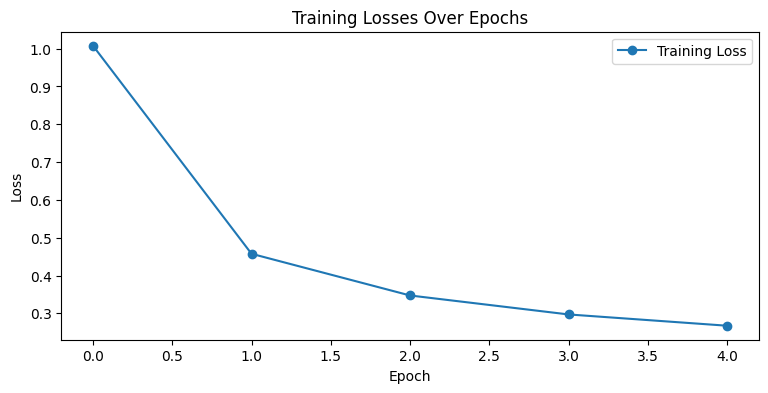

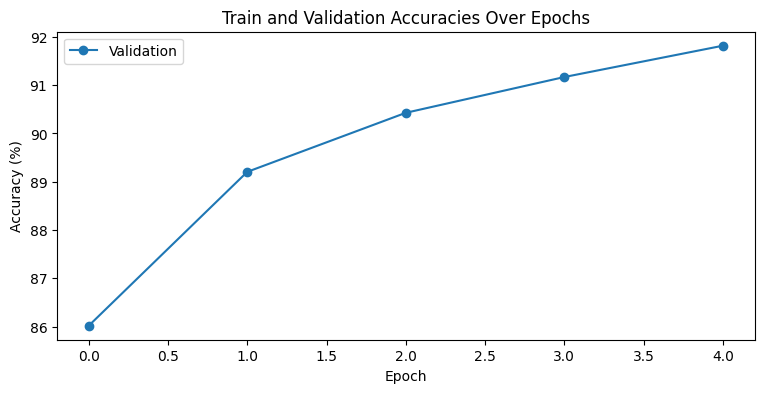

In [9]:
import matplotlib.pyplot as plt

plt.title('Training Losses Over Epochs')
plt.plot(losses, marker='o', label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.gcf().set_size_inches(9, 4)
plt.legend(loc='upper right') 
plt.show()

plt.title('Train and Validation Accuracies Over Epochs')
plt.plot(val_accuracies, '-o', label='Validation Accuracy') 
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend(['Validation'], loc='upper left')
plt.gcf().set_size_inches(9, 4)

### Evaluate the fine-tuned model

In [10]:
fine_tune_accuracy = fine_tuner.evaluate(val_loader)

Evaluating: 100%|██████████| 1350/1350 [04:09<00:00,  5.41it/s]

Accuracy: 91.81%


## Second Tuning

In [31]:
import importlib
import clip_EuroSAT
importlib.reload(clip_EuroSAT)

Using device: cpu


<module 'clip_EuroSAT' from 'e:\\workplace\\r\\CLIP\\workplace\\clip_EuroSAT.py'>

In [40]:
from clip_EuroSAT import load_eurosat

train_loader, val_loader, class_names = load_eurosat()
print("Load EuroSAT.")

Load EuroSAT.


In [41]:
from clip_EuroSAT import load_clip_model

model, preprocess = load_clip_model("ViT-B/32")

Loaded CLIP model: ViT-B/32


In [42]:
from clip_EuroSAT import CLIPFineTuner, save_model

fine_tuner = CLIPFineTuner(model, len(class_names), learning_rate=1e-4)
num_epochs = 5
best_accuracy = 0.88

losses = []  # Track loss for each epoch
train_accuracies = []  # Track training accuracy per epoch
val_accuracies = []  # Track validation accuracy

best_accuracy = 0.0  # Track best validation accuracy

for epoch in range(num_epochs):
    # Train for one epoch
    avg_loss, train_accuracy = fine_tuner.train_epoch(train_loader)
    losses.append(avg_loss)
    train_accuracies.append(train_accuracy)
    print(f"Epoch {epoch+1}/{num_epochs}, Avg Loss: {avg_loss:.4f}, Training Accuracy: {train_accuracy:.2f}%")

    # Evaluate on validation set
    val_accuracy = fine_tuner.evaluate(val_loader)
    val_accuracies.append(val_accuracy)
    print(f"Validation Accuracy: {val_accuracy:.2f}%")

    # Save the best model
    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        save_model(fine_tuner, fine_tuner.optimizer, epoch, "saved_models/fine_tuned_clip2.pt")

print(f"Training complete. Best Validation Accuracy: {best_accuracy:.2f}%")

Training: 100%|██████████| 5400/5400 [33:38<00:00,  2.67it/s]


Epoch 1/5, Avg Loss: 1.0056, Training Accuracy: 78.58%


Evaluating: 100%|██████████| 1350/1350 [04:36<00:00,  4.89it/s]


Accuracy: 86.37%
Validation Accuracy: 86.37%
Model saved at epoch 1 to: saved_models/fine_tuned_clip2.pt


Training: 100%|██████████| 5400/5400 [30:43<00:00,  2.93it/s]


Epoch 2/5, Avg Loss: 0.4586, Training Accuracy: 88.32%


Evaluating: 100%|██████████| 1350/1350 [03:54<00:00,  5.75it/s]


Accuracy: 89.41%
Validation Accuracy: 89.41%
Model saved at epoch 2 to: saved_models/fine_tuned_clip2.pt


Training: 100%|██████████| 5400/5400 [30:50<00:00,  2.92it/s]


Epoch 3/5, Avg Loss: 0.3487, Training Accuracy: 90.48%


Evaluating: 100%|██████████| 1350/1350 [03:55<00:00,  5.74it/s]


Accuracy: 90.83%
Validation Accuracy: 90.83%
Model saved at epoch 3 to: saved_models/fine_tuned_clip2.pt


Training: 100%|██████████| 5400/5400 [30:50<00:00,  2.92it/s]


Epoch 4/5, Avg Loss: 0.2989, Training Accuracy: 91.65%


Evaluating: 100%|██████████| 1350/1350 [03:56<00:00,  5.70it/s]


Accuracy: 91.59%
Validation Accuracy: 91.59%
Model saved at epoch 4 to: saved_models/fine_tuned_clip2.pt


Training: 100%|██████████| 5400/5400 [30:53<00:00,  2.91it/s]


Epoch 5/5, Avg Loss: 0.2690, Training Accuracy: 92.38%


Evaluating: 100%|██████████| 1350/1350 [03:54<00:00,  5.75it/s]

Accuracy: 92.15%
Validation Accuracy: 92.15%
Model saved at epoch 5 to: saved_models/fine_tuned_clip2.pt
Training complete. Best Validation Accuracy: 92.15%


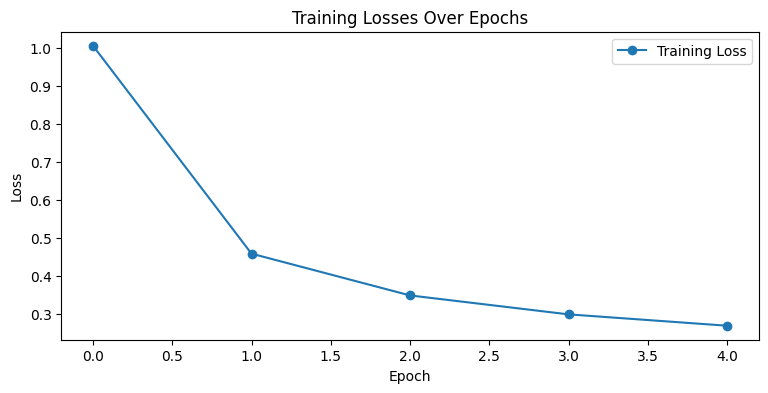

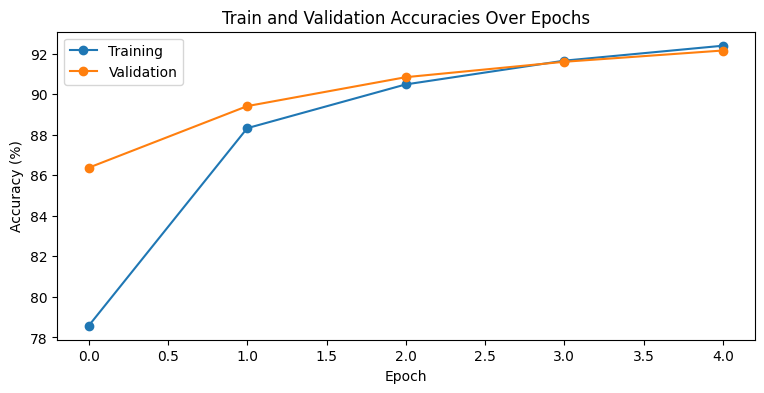

In [43]:
import matplotlib.pyplot as plt

# Plot Training Losses Over Epochs
plt.title('Training Losses Over Epochs')
plt.plot(losses, marker='o', label='Training Loss')  # Add training losses
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.gcf().set_size_inches(9, 4)  # Adjust figure size
plt.legend(loc='upper right')
plt.show()

# Plot Train and Validation Accuracies Over Epochs
plt.title('Train and Validation Accuracies Over Epochs')
plt.plot(train_accuracies, '-o', label='Training Accuracy')  # Add training accuracies
plt.plot(val_accuracies, '-o', label='Validation Accuracy')  # Add validation accuracies
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend(['Training', 'Validation'], loc='upper left')  # Add legend for both
plt.gcf().set_size_inches(9, 4)  # Adjust figure size
plt.show()

In [44]:
import importlib
import clip_EuroSAT
importlib.reload(clip_EuroSAT)

Using device: cpu


<module 'clip_EuroSAT' from 'e:\\workplace\\r\\CLIP\\workplace\\clip_EuroSAT.py'>

In [46]:
from clip_EuroSAT import load_eurosat

train_loader, val_loader, class_names = load_eurosat(100)
print("Load EuroSAT.")

Load EuroSAT.


In [ ]:
from clip_EuroSAT import load_clip_model

model, preprocess = load_clip_model("ViT-B/32")
print(model)

Loaded CLIP model: ViT-B/32
CLIP(
  (visual): VisionTransformer(
    (conv1): Conv2d(3, 768, kernel_size=(32, 32), stride=(32, 32), bias=False)
    (ln_pre): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (transformer): Transformer(
      (resblocks): Sequential(
        (0): ResidualAttentionBlock(
          (attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
          )
          (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (mlp): Sequential(
            (c_fc): Linear(in_features=768, out_features=3072, bias=True)
            (gelu): QuickGELU()
            (c_proj): Linear(in_features=3072, out_features=768, bias=True)
          )
          (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        )
        (1): ResidualAttentionBlock(
          (attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_feature

In [ ]:
for name, module in model.named_modules():
    if isinstance(module, torch.nn.Linear):
        print(name)

In [ ]:
# Inspect model structure
for name, module in model.named_modules():
    print(name, ":", type(module))